In [22]:
import pandas as pd
from pretty_dict import pretty

data: pd.DataFrame = pd.read_csv(r"C:\Users\orhun\OneDrive\Belgeler\GitHub\Stock-Price\Others\AAPL_stock_prices.csv")

print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099058  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086999  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091737   73449600


In [23]:
aapl_data = data[['Date','Open','Close']]

In [24]:
aapl_data.set_index('Date',drop=True,inplace=True)
aapl_data.head()

,Open,Close
Date,,
1980-12-12,0.128348,0.128348
1980-12-15,0.122210,0.121652
1980-12-16,0.113281,0.112723
1980-12-17,0.115513,0.115513
1980-12-18,0.118862,0.118862


<Axes: title={'center': 'AAPL'}, xlabel='Date'>

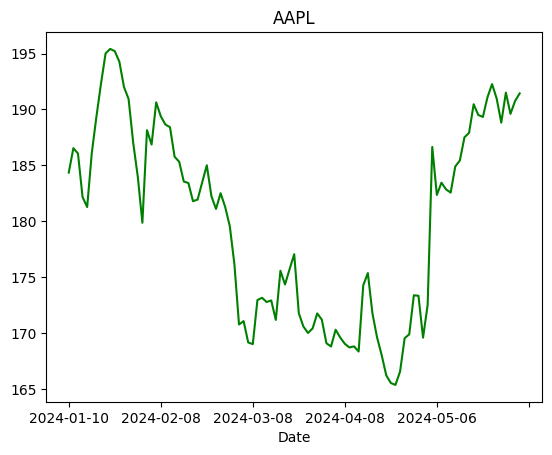

In [43]:
aapl_data["Open"][-100:-1].plot(title="AAPL", color="green")

<Axes: title={'center': 'AAPL'}, xlabel='Date'>

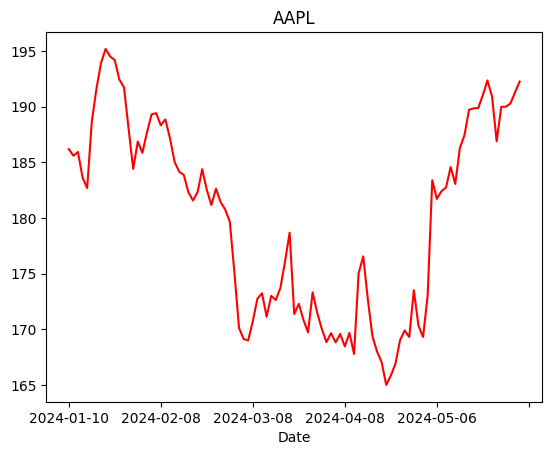

In [44]:
aapl_data["Close"][-100:-1].plot(title="AAPL", color="red")

In [51]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
aapl_data[aapl_data.columns] = Ms.fit_transform(aapl_data)

training_size = round(len(aapl_data) * 0.80)

train_data = aapl_data[:training_size]
test_data  = aapl_data[training_size:]

print(train_data.head(), train_data.shape)
print(test_data.head(), test_data.shape)

                Open     Close
Date                          
1980-12-12  0.000397  0.000400
1980-12-15  0.000366  0.000366
1980-12-16  0.000321  0.000321
1980-12-17  0.000333  0.000335
1980-12-18  0.000350  0.000352 (8767, 2)
                Open     Close
Date                          
2015-09-17  0.145806  0.143546
2015-09-18  0.141450  0.142953
2015-09-21  0.143293  0.145175
2015-09-22  0.142927  0.142890
2015-09-23  0.143243  0.144051 (2192, 2)


C:\Users\orhun\AppData\Local\Temp\ipykernel_18224\526601097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data[aapl_data.columns] = Ms.fit_transform(aapl_data)


In [60]:
import numpy as np
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
print("Train Seq", train_seq.shape, train_seq[:1], "Train Label", train_label.shape, train_label[:1], "Test Seq", test_seq.shape, test_seq[:1], "Test Label", test_label.shape, test_label[:1], sep="\n")

Train Seq
(8717, 50, 2)
[[[0.00039745 0.00040008]
  [0.00036644 0.00036628]
  [0.00032134 0.00032119]
  [0.00033262 0.00033528]
  [0.00034953 0.00035219]
  [0.00038617 0.00038881]
  [0.00041718 0.00041981]
  [0.00044537 0.00044798]
  [0.00048201 0.00048461]
  [0.00054966 0.00055223]
  [0.00056094 0.0005635 ]
  [0.00054403 0.00054378]
  [0.00052148 0.00052124]
  [0.00052711 0.00052969]
  [0.00051302 0.00051279]
  [0.00047919 0.00047897]
  [0.00044819 0.00044798]
  [0.0004341  0.0004339 ]
  [0.00046792 0.00047052]
  [0.00046792 0.00046489]
  [0.00043973 0.00043953]
  [0.00043973 0.00044235]
  [0.00045383 0.00045644]
  [0.00045101 0.0004508 ]
  [0.00049047 0.00049306]
  [0.00047074 0.00047052]
  [0.00048201 0.00048461]
  [0.00049047 0.00049306]
  [0.00049047 0.00049024]
  [0.00047919 0.00047897]
  [0.00047637 0.00047334]
  [0.00045101 0.0004508 ]
  [0.00042564 0.00042544]
  [0.00039181 0.00038881]
  [0.00035235 0.00035219]
  [0.00037208 0.00037473]
  [0.00039463 0.00039727]
  [0.00039463 

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [64]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_3 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)
test_predicted = model.predict(test_seq)
test_inverse_predicted = Ms.inverse_transform(test_predicted)

Epoch 1/80
273/273 [==============================] - 25s 48ms/step - loss: 3.4730e-05 - mean_absolute_error: 0.0022 - val_loss: 0.0106 - val_mean_absolute_error: 0.0704
Epoch 2/80
273/273 [==============================] - 9s 33ms/step - loss: 5.4609e-06 - mean_absolute_error: 0.0014 - val_loss: 0.0108 - val_mean_absolute_error: 0.0721
Epoch 3/80
273/273 [==============================] - 9s 33ms/step - loss: 4.6669e-06 - mean_absolute_error: 0.0013 - val_loss: 0.0113 - val_mean_absolute_error: 0.0768
Epoch 4/80
273/273 [==============================] - 8s 29ms/step - loss: 4.9225e-06 - mean_absolute_error: 0.0014 - val_loss: 0.0053 - val_mean_absolute_error: 0.0487
Epoch 5/80
273/273 [==============================] - 7s 27ms/step - loss: 4.0140e-06 - mean_absolute_error: 0.0012 - val_loss: 0.0027 - val_mean_absolute_error: 0.0344
Epoch 6/80
273/273 [==============================] - 9s 31ms/step - loss: 4.1181e-06 - mean_absolute_error: 0.0013 - val_loss: 0.0038 - val_mean_absolute

In [67]:
# Merging actual and predicted data for better visualization
gs_slic_data = pd.concat([aapl_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=aapl_data.iloc[-202:].index)], axis=1)

gs_slic_data[['open','close']] = Ms.inverse_transform(gs_slic_data[['open','close']])

ValueError: Shape of passed values is (2142, 2), indices imply (202, 2)